### PV dataset EDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk

In [2]:
df = pd.read_csv('core\\static\\data\\2022_15min_data.csv')
df.head()

,Time,PV Productie (W)
0,2021-12-26 00:00:00,0.0
1,2021-12-26 00:15:00,0.0
2,2021-12-26 00:30:00,0.0
3,2021-12-26 00:45:00,0.0
4,2021-12-26 01:00:00,0.0


In [3]:
df.isnull().any()

Time                False
PV Productie (W)    False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              33600 non-null  object 
 1   PV Productie (W)  33600 non-null  float64
dtypes: float64(1), object(1)
memory usage: 525.1+ KB


In [5]:
df.shape

(33600, 2)

In [6]:
df.describe()

,PV Productie (W)
count,33600.000000
mean,270.817604
std,489.592830
min,0.000000
25%,0.000000
50%,0.000000
75%,298.997025
max,2756.399200


In [7]:
df['Time'] = pd.to_datetime(df['Time'])
df['DateTime'] = df['Time'] 
df = df.drop('Time', axis=1)
df.head()

,PV Productie (W),DateTime
0,0.0,2021-12-26 00:00:00
1,0.0,2021-12-26 00:15:00
2,0.0,2021-12-26 00:30:00
3,0.0,2021-12-26 00:45:00
4,0.0,2021-12-26 01:00:00


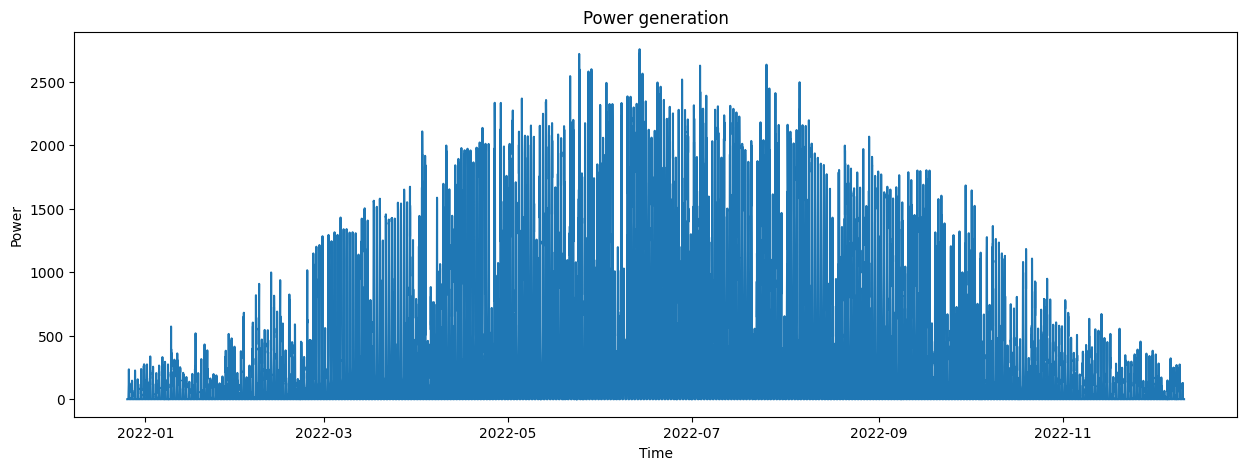

In [8]:
# Plot whole dataset, datetime x,power y
plt.figure(figsize=(15, 5))
plt.plot(df['DateTime'], df['PV Productie (W)'])
plt.title('Power generation')
plt.xlabel('Time')
plt.ylabel('Power')
plt.show()

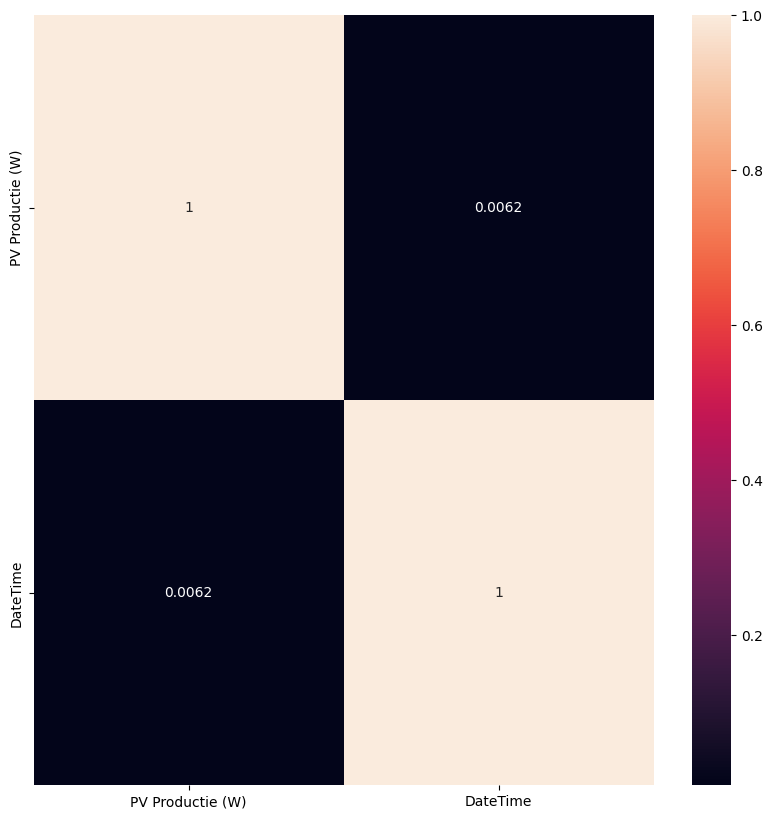

In [9]:
# Correlation
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()


In [10]:
# Lets combine the dataframes
df_pv = pd.read_csv('core\\static\\data\\2022_15min_data.csv', sep=',', low_memory=False)
df_solar = pd.read_csv('core\\static\\data\\solar_simulation_data.csv', sep=',', low_memory=False)

In [11]:
df_pv.head()

,Time,PV Productie (W)
0,2021-12-26 00:00:00,0.0
1,2021-12-26 00:15:00,0.0
2,2021-12-26 00:30:00,0.0
3,2021-12-26 00:45:00,0.0
4,2021-12-26 01:00:00,0.0


In [12]:
df_solar.head()

,Timestamp,Solar Zenith (degrees),Solar Azimuth (degrees),DNI (W/m^2),GHI (W/m^2),DHI (W/m^2),POA Global (W/m^2),Temperature (C),DC Power (W),AC Power (W)
0,2021-12-26 00:00:00+01:00,150.017744,340.977130,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-26 00:15:00+01:00,150.634136,347.818869,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-12-26 00:30:00+01:00,150.979467,354.841651,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-12-26 00:45:00+01:00,151.043428,1.944296,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-12-26 01:00:00+01:00,150.824056,9.016439,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Combining, getting GHI into the df_pv
df_pv['DateTime'] = pd.to_datetime(df_pv['Time'])
df_pv = df_pv.drop('Time', axis=1)
df_pv['GHI (W/m^2)'] = df_solar['GHI (W/m^2)']
df_pv.head()

,PV Productie (W),DateTime,GHI (W/m^2)
0,0.0,2021-12-26 00:00:00,0.0
1,0.0,2021-12-26 00:15:00,0.0
2,0.0,2021-12-26 00:30:00,0.0
3,0.0,2021-12-26 00:45:00,0.0
4,0.0,2021-12-26 01:00:00,0.0


In [14]:
df_pv.describe()

,PV Productie (W),DateTime,GHI (W/m^2)
count,33600.000000,33600,33505.000000
mean,270.817604,2022-06-18 23:52:30,183.184661
min,0.000000,2021-12-26 00:00:00,0.000000
25%,0.000000,2022-03-23 11:56:15,0.000000
50%,0.000000,2022-06-18 23:52:30,1.634994
75%,298.997025,2022-09-14 11:48:45,334.781577
max,2756.399200,2022-12-10 23:45:00,847.937256
std,489.592830,NaN,254.666186


In [15]:
# save into a csv
df_pv.to_csv('core\\static\\data\\2022_15min_data_with_GHI.csv', index=False)

                  PV Productie (W)  DateTime  GHI (W/m^2)
PV Productie (W)          1.000000  0.006198     0.610339
DateTime                  0.006198  1.000000     0.007912
GHI (W/m^2)               0.610339  0.007912     1.000000


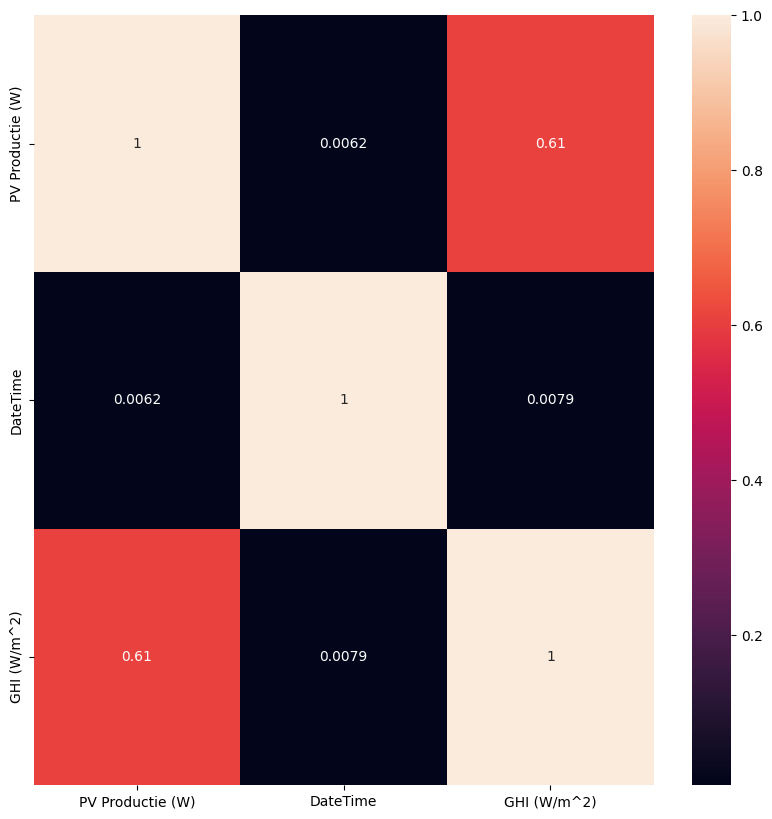

In [20]:
df = pd.read_csv('core\\static\\data\\2022_15min_data_with_GHI.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
corr = df.corr()
print(corr)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

Uit de bovenstaande correlatiematrix is al te concluderen dat de opbrengst van de pv(zonnepanelen) correleert met de intensiteit van de zonnestraling.

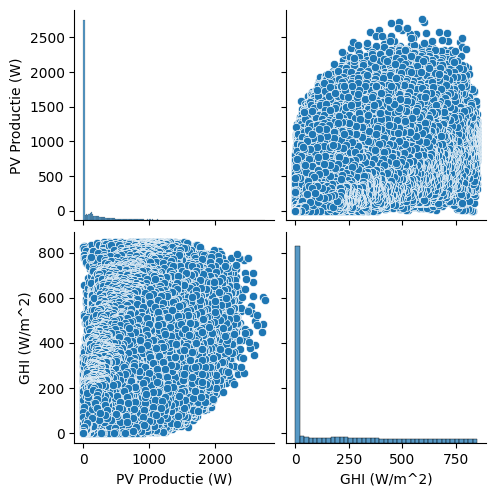

In [22]:
sns.pairplot(df)

In [23]:
# split date time into seperate columns
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df.head()

,PV Productie (W),DateTime,GHI (W/m^2),Year,Month,Day,Hour,Minute,Second
0,0.0,2021-12-26 00:00:00,0.0,2021,12,26,0,0,0
1,0.0,2021-12-26 00:15:00,0.0,2021,12,26,0,15,0
2,0.0,2021-12-26 00:30:00,0.0,2021,12,26,0,30,0
3,0.0,2021-12-26 00:45:00,0.0,2021,12,26,0,45,0
4,0.0,2021-12-26 01:00:00,0.0,2021,12,26,1,0,0


In [24]:
df.to_csv('core\\static\\data\\2022_15min_data_with_GHI.csv', index=False)

                  PV Productie (W)  DateTime  GHI (W/m^2)          Year  \
PV Productie (W)          1.000000  0.006198     0.610339  6.672288e-02   
DateTime                  0.006198  1.000000     0.007912  2.248265e-01   
GHI (W/m^2)               0.610339  0.007912     1.000000  7.606478e-02   
Year                      0.066723  0.224826     0.076065  1.000000e+00   
Month                    -0.022364  0.894295    -0.026834 -2.267185e-01   
Day                      -0.018489 -0.007367     0.006802 -1.905469e-01   
Hour                      0.253005  0.002855     0.084608  2.267572e-14   
Minute                    0.000826  0.000115     0.000036 -4.355513e-15   
Second                         NaN       NaN          NaN           NaN   

                         Month           Day          Hour        Minute  \
PV Productie (W) -2.236363e-02 -1.848886e-02  2.530048e-01  8.264529e-04   
DateTime          8.942947e-01 -7.366538e-03  2.854662e-03  1.152674e-04   
GHI (W/m^2)      -2.6

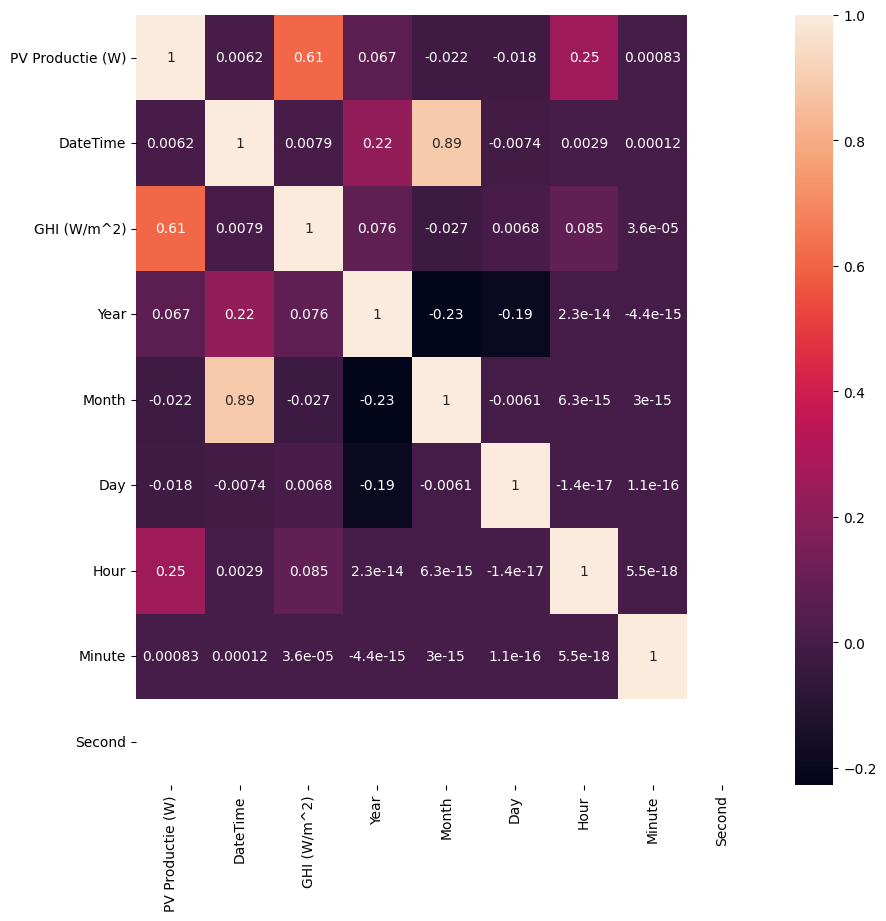

In [25]:
df = pd.read_csv('core\\static\\data\\2022_15min_data_with_GHI.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
corr = df.corr()
print(corr)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

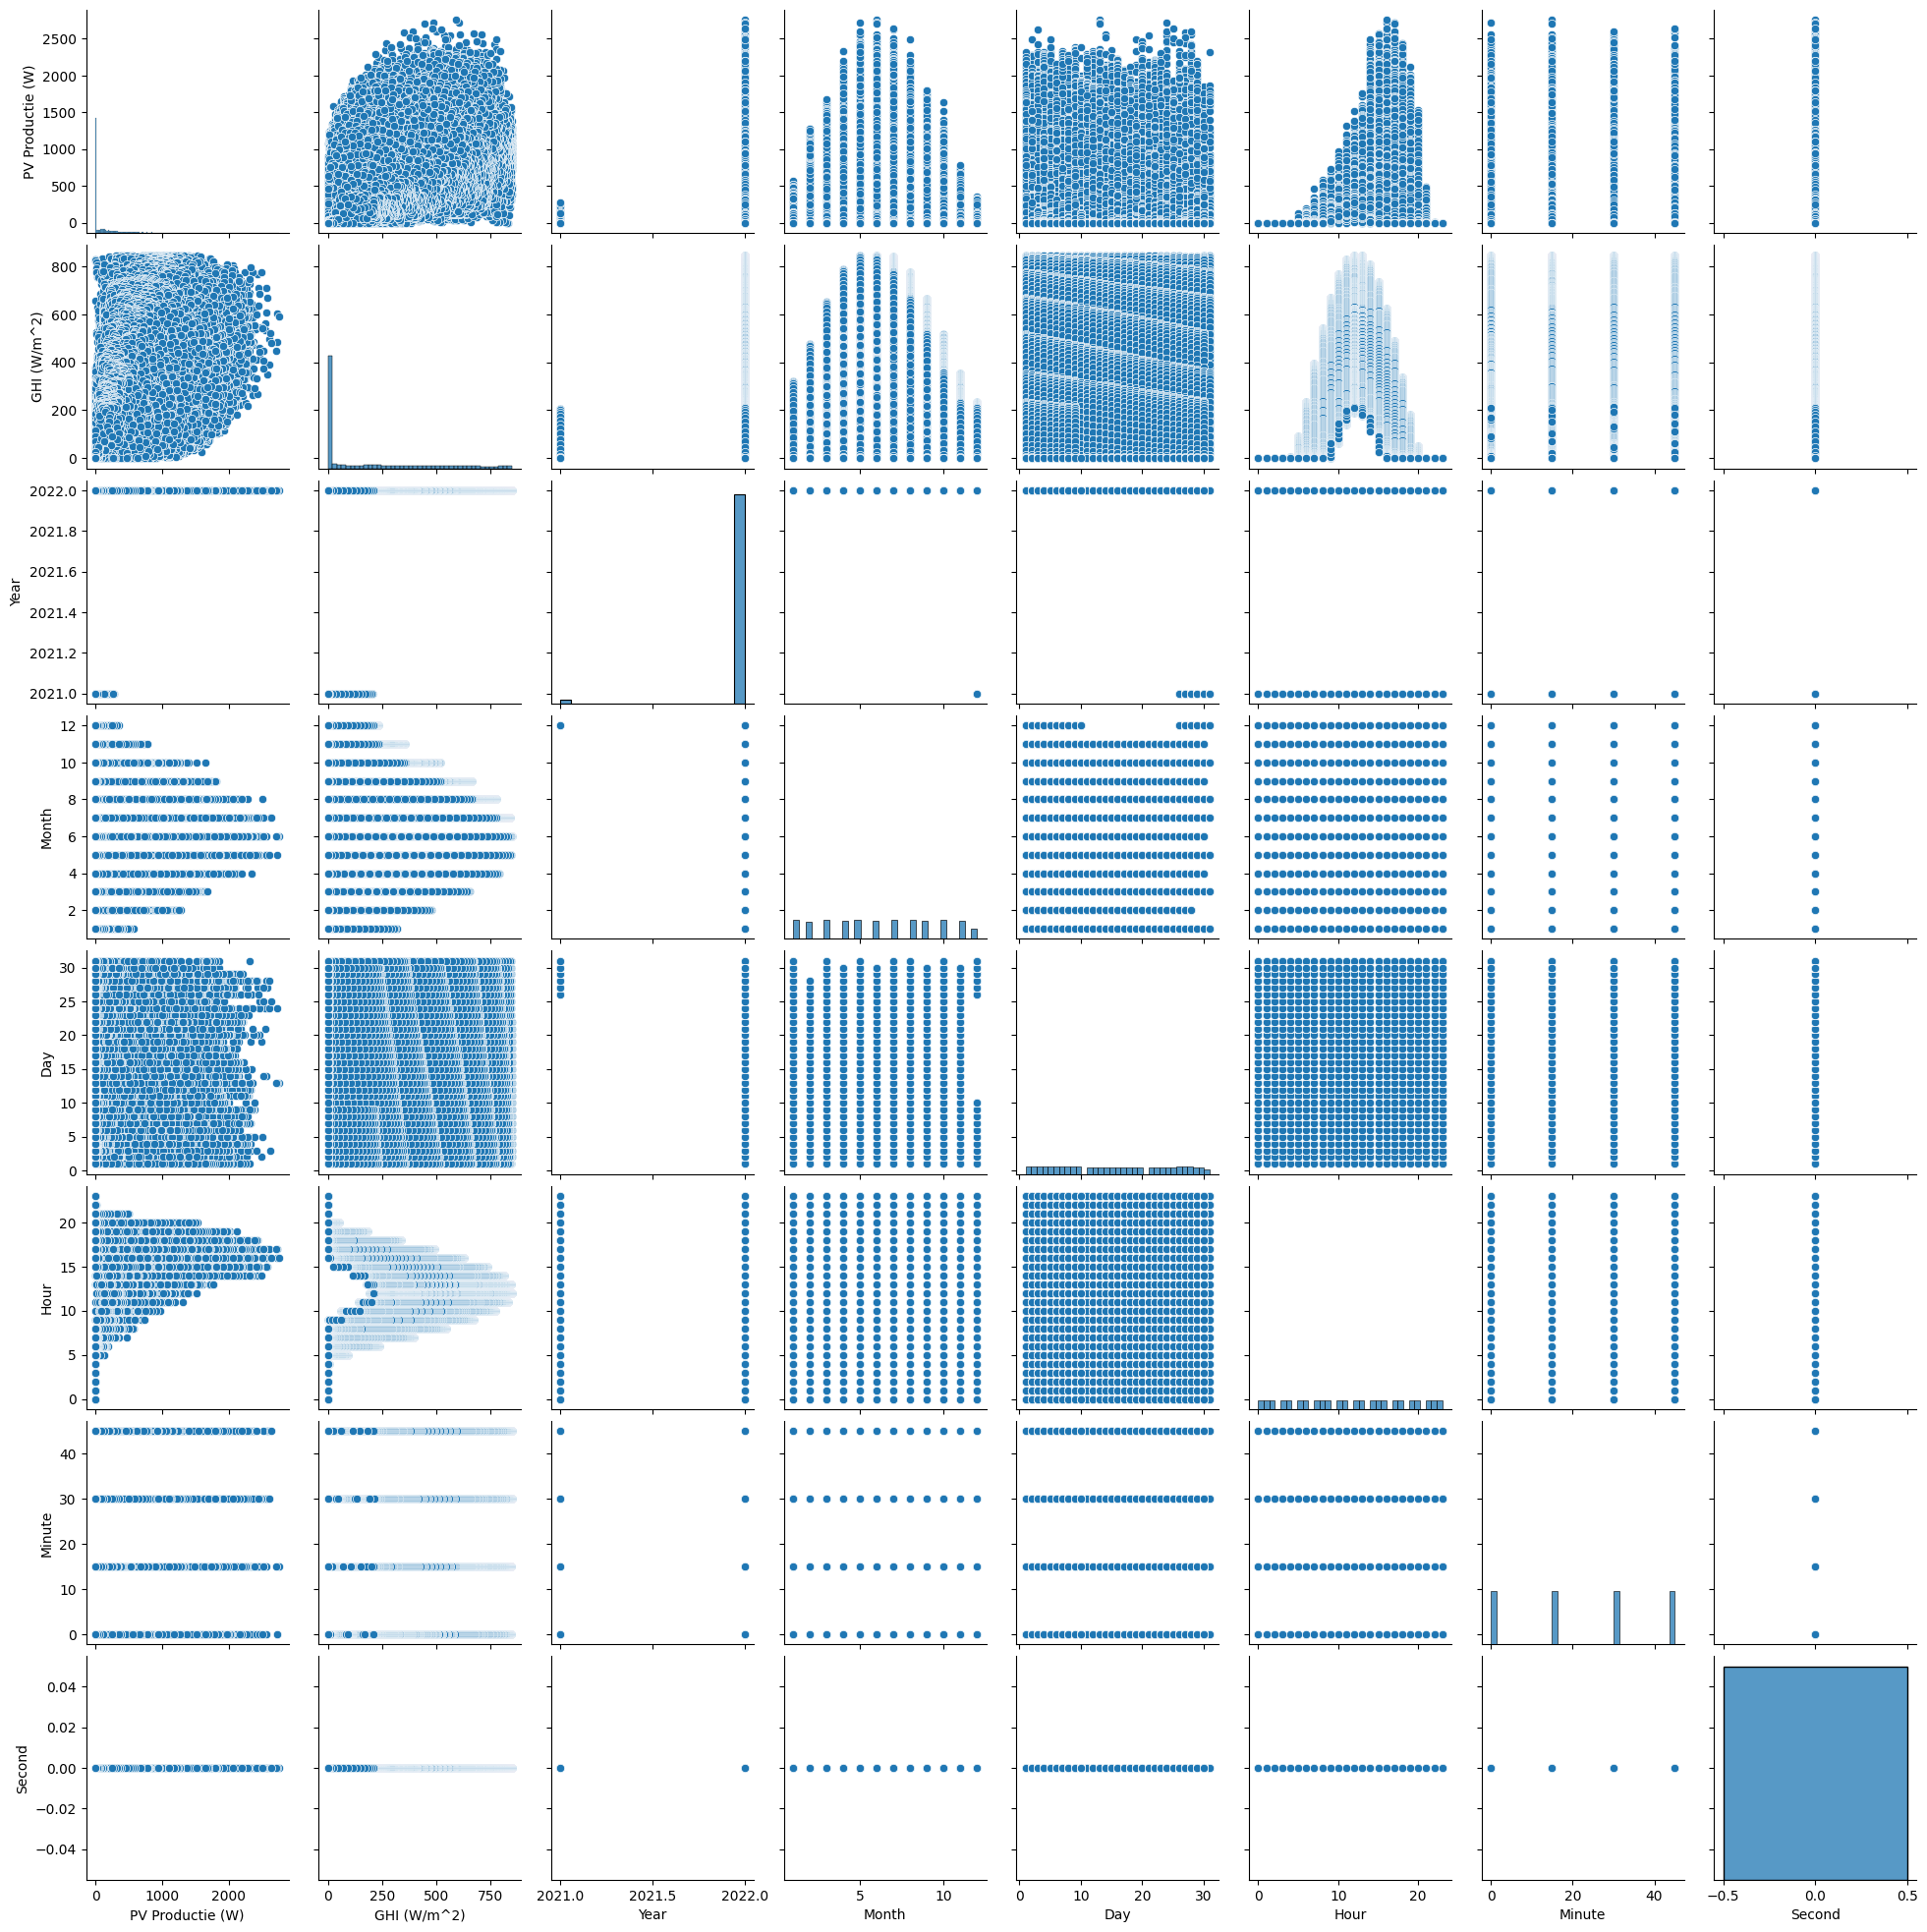

In [26]:
sns.pairplot(df)

In [27]:
df.isnull().any()

PV Productie (W)    False
DateTime            False
GHI (W/m^2)          True
Year                False
Month               False
Day                 False
Hour                False
Minute              False
Second              False
dtype: bool

In [28]:
df.isnull().sum()

PV Productie (W)     0
DateTime             0
GHI (W/m^2)         95
Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
Second               0
dtype: int64

In [30]:
#fill values
df = df.fillna(method='ffill')
df.to_csv('core\\static\\data\\2022_15min_data_with_GHI.csv', index=False)

C:\Users\oscar\AppData\Local\Temp\ipykernel_8384\3023374413.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
